# Explore here

In [1]:
import pandas as pd  #si
import ast
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
#\import plotly.express as px

from sklearn.datasets import make_regression
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split

# supervisado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# no supervisado
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

Subir los archivos y cargarlos en DataFrames

In [2]:
movies_url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_movies.csv"
credits_url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/main/tmdb_5000_credits.csv"


movies_df = pd.read_csv(movies_url)
credits_df = pd.read_csv(credits_url)

# Contar nulos por columna
print("Conteo de nulos por columna:")
print(movies_df.isnull().sum())

print("Conteo de nulos por columna:")
print(credits_df.isnull().sum())



Conteo de nulos por columna:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
Conteo de nulos por columna:
movie_id    0
title       0
cast        0
crew        0
dtype: int64


Comprobamos si la columna "id" es idéntica a "movie_id" y "tittle" a "original_tittle" para poder hacer el merge juntándolas en una sola

In [3]:
id_match = movies_df['id'].isin(credits_df['movie_id']).all()
movie_id_match = credits_df['movie_id'].isin(movies_df['id']).all()

print(f"¿Todos los 'id' de movies están en 'movie_id' de credits? {id_match}")
print(f"¿Todos los 'movie_id' de credits están en 'id' de movies? {movie_id_match}")

¿Todos los 'id' de movies están en 'movie_id' de credits? True
¿Todos los 'movie_id' de credits están en 'id' de movies? True


In [4]:
# Verificar si los IDs coinciden entre las tablas
id_match = movies_df['id'].isin(credits_df['movie_id']).all()
movie_id_match = credits_df['movie_id'].isin(movies_df['id']).all()

# Mostrar los resultados de la verificación
print(f"¿Todos los 'id' de movies están en 'movie_id' de credits? {id_match}")
print(f"¿Todos los 'movie_id' de credits están en 'id' de movies? {movie_id_match}")



¿Todos los 'id' de movies están en 'movie_id' de credits? True
¿Todos los 'movie_id' de credits están en 'id' de movies? True


In [5]:
# Crear un DataFrame para chequear id, movie_id, title y original_title
check_df = pd.DataFrame({
    'movies_id': movies_df['id'],  # id de movies
    'movies_title': movies_df['title'],  # title de movies
    'movies_original_title': movies_df['original_title'],  # original_title de movies
    'credits_movie_id': credits_df['movie_id'],  # movie_id de credits
    'credits_title': credits_df['title']  # title de credits
})

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)




# Mostrar las primeras filas del DataFrame de chequeo
check_df.head()



,movies_id,movies_title,movies_original_title,credits_movie_id,credits_title
0,19995,Avatar,Avatar,19995,Avatar
1,285,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,285,Pirates of the Caribbean: At World's End
2,206647,Spectre,Spectre,206647,Spectre
3,49026,The Dark Knight Rises,The Dark Knight Rises,49026,The Dark Knight Rises
4,49529,John Carter,John Carter,49529,John Carter


¿Hay duplicados?

In [6]:
movies_dupli = movies_df['id'].duplicated().any()
credits_dupli = credits_df['movie_id'].duplicated().any()

print(f"¿Existen duplicados en 'id' de movies? {movies_dupli}")
print(f"¿Existen duplicados en 'movie_id' de credits? {credits_dupli}")


¿Existen duplicados en 'id' de movies? False
¿Existen duplicados en 'movie_id' de credits? False


Unir los DataFrames y guardarlos con la base de datos como tablas   MIRAR TITLE_Y

In [7]:
df = pd.merge(
    movies_df, credits_df,
    left_on="id", right_on="movie_id",
)

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Limpiar el data set para quedarnos solo con las columnas requeridas

In [8]:
# Mantener solo las columnas requeridas
df = df[['movie_id', 'title_x', 'overview', 'genres', 'keywords', 'cast', 'crew']]

# Renombrar 'title_x' a 'title' para mayor claridad
df = df.rename(columns={'title_x': 'title'})

# Verificar el DataFrame resultante
df.head()


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
list(df.columns)

['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']

In [10]:
# Guardar el DataFrame limpio (df) en un archivo CSV
df.to_csv('movies_cleaned.csv', index=False)

# Confirmar que el archivo CSV ha sido creado
"Archivo 'movies_cleaned.csv' creado con éxito en el directorio actual."


"Archivo 'movies_cleaned.csv' creado con éxito en el directorio actual."

Como puedes ver, hay algunas columnas con formato JSON. De cada uno de los JSONs, selecciona el atributo `name` y reemplaza las columnas `genres` y `keywords`. Para la columna `cast`, selecciona los tres primeros nombres.

In [11]:
df[['genres', 'keywords']].head()

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."


In [12]:
#hemos importado ast
def extract_names(json_str):
    try:
        data = ast.literal_eval(json_str) #convierte la cadena json en una lista de diccionarios
        return [item['name'] for item in data] # saca el atributo name de cada dict
    except:
        return[] #sale una lista vacía si no se ha conseguido

# Aplicar función a genres y keywords
df['genres'] = df['genres'].apply(extract_names)
df['keywords'] = df['keywords'].apply(extract_names)

In [13]:
df[['genres', 'keywords']].head()


,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ..."
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi..."
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i..."
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel..."


In [14]:
df['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [15]:
def extract_cast(json_str):
    try:
        # Intenta evaluar la cadena JSON y extrae los 3 primeros nombres
        data = ast.literal_eval(json_str)
        return [item['name'] for item in data[:3]]  # Extrae los 3 primeros nombres
    except Exception as e:
        # Devuelve una lista vacía si hay un error
        print(f"Error procesando {json_str}: {e}")
        return []

# Aplica la función a la columna 'cast'
df['cast'] = df['cast'].apply(extract_cast)


In [16]:
df['cast'].head()

0    [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1       [Johnny Depp, Orlando Bloom, Keira Knightley]
2        [Daniel Craig, Christoph Waltz, Léa Seydoux]
3        [Christian Bale, Michael Caine, Gary Oldman]
4      [Taylor Kitsch, Lynn Collins, Samantha Morton]
Name: cast, dtype: object

Las únicas columnas que quedan por modificar son `crew` (equipo) y `overview` (resumen).   
Para la primera columna, transfórmala para que contenga el nombre del director. Para la segunda, conviértela en una lista.

CREW

In [17]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

Función para sacar los nombres de los directores y Unknown en caso de que no haya

In [18]:
def get_director_or_unknown(obj):
    """
    Extrae el nombre del director de la columna crew.
    Si no hay director o la fila es nula, devuelve 'Unknown'.
    """
    if pd.isnull(obj):  # Si el valor es nulo
        return "Unknown"
    for i in ast.literal_eval(obj):  
        if i["job"] == "Director":
            return i["name"]  # Devuelve el nombre del director
    return "Unknown"  # Si no encuentra un director

df["crew"] = df["crew"].apply(get_director_or_unknown)
df['crew'].head()


0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: crew, dtype: object

In [19]:
# Crear un DataFrame con las filas donde 'crew' es 'Unknown' para chequearlo
unknown_crew_df = df[df['crew'] == 'Unknown'][['movie_id', 'title', 'crew', ]]

# Mostrar las primeras filas de ese DataFrame
unknown_crew_df


,movie_id,title,crew
3661,19615,Flying By,Unknown
3670,447027,Running Forever,Unknown
3729,26379,Paa,Unknown
3977,55831,Boynton Beach Club,Unknown
4068,371085,Sharkskin,Unknown
4105,48382,"The Book of Mormon Movie, Volume 1: The Journey",Unknown
4118,325140,Hum To Mohabbat Karega,Unknown
4123,20653,Roadside Romeo,Unknown
4247,361505,Me You and Five Bucks,Unknown
4305,114065,Down & Out With The Dolls,Unknown


OVERVIEW

In [20]:
df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [21]:
# Verificar las filas donde 'overview' es nulo
nulos_overview = df[df['overview'].isnull()]

# Mostrar las filas con valores nulos
print(nulos_overview[['movie_id', 'title', 'overview']])


      movie_id                                       title overview
2656    370980  Chiamatemi Francesco - Il Papa della gente      NaN
4140    459488                 To Be Frank, Sinatra at 100      NaN
4431    292539                                 Food Chains      NaN


Cambio a No overview available' las columnas con nulos.


In [22]:
df['overview'].fillna('No overview available', inplace=True)
df['overview']


0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
5       The seemingly invincible Spider-Man goes up ag...
6       When the kingdom's most wanted-and most charmi...
7       When Tony Stark tries to jumpstart a dormant p...
8       As Harry begins his sixth year at Hogwarts, he...
9       Fearing the actions of a god-like Super Hero l...
10      Superman returns to discover his 5-year absenc...
11      Quantum of Solace continues the adventures of ...
12      Captain Jack Sparrow works his way out of a bl...
13      The Texas Rangers chase down a gang of outlaws...
14      A young boy learns that he has extraordinary p...
15      One year after their incredible adventures in ...
16      When an unexpected enemy emerges and threatens...
17      Captai

In [23]:
# Convertimos `overview` en lista
df["overview"] = df["overview"].apply(lambda x: x.split() if isinstance(x, str) else [])

Convertimos todo a listas

In [24]:
# Ver tipos de datos en las columnas clave
for col in ['genres', 'cast', 'crew', 'keywords', 'overview']:
    print(f"Tipos en la columna {col}:")
    print(df[col].apply(type).value_counts())
    print("\n")


Tipos en la columna genres:
genres
<class 'list'>    4803
Name: count, dtype: int64


Tipos en la columna cast:
cast
<class 'list'>    4803
Name: count, dtype: int64


Tipos en la columna crew:
crew
<class 'str'>    4803
Name: count, dtype: int64


Tipos en la columna keywords:
keywords
<class 'list'>    4803
Name: count, dtype: int64


Tipos en la columna overview:
overview
<class 'list'>    4803
Name: count, dtype: int64




Reduciremos nuestro conjunto de datos combinando todas nuestras columnas convertidas anteriores en una sola columna llamada `tags` (que crearemos). Esta columna ahora tendrá todos los elementos separados por comas y luego las reemplazaremos por espacios en blanco. 

In [25]:
# Limpando las columnas
for col in ['genres', 'keywords', 'cast', 'crew']:
    df[col] = df[col].apply(lambda x: [str(i).replace(" ", "") for i in x] if isinstance(x, list) else[])

# Crear la columna `tags`
df["tags"] = df.apply(
    lambda x: " ".join(x["overview"]) + " " +
              " ".join(x["genres"]) + " " +
              " ".join(x["keywords"]) + " " +
              " ".join(x["cast"]) + " " +
              (x["crew"] if isinstance(x["crew"], str) else ""),
    axis=1
)

# Visualizamos el DataFrame resultante
print(df[["movie_id", "title", "tags"]].head())


   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                tags  
0  In the 22nd century, a paraplegic Marine is di...  
1  Captain Barbossa, long believed to be dead, ha...  
2  A cryptic message from Bond’s past sends him o...  
3  Following the death of District Attorney Harve...  
4  John Carter is a war-weary, former military ca...  


In [26]:
df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver '

#### Paso 4: Construye un KNN

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorización del texto
cv = CountVectorizer(max_features=5000, stop_words='english') # Limita el número máximo de palabras únicas a 5000 (las más frecuentes) y elimina palabras comunes que no aportan significado, como "and", "the", "is".
vectors = cv.fit_transform(df["tags"]).toarray() # Fit aprende las palabras únicas del texo en tags y transform concierte el texto en números - toarray concierte el resultado en matriz de numpy

print(vectors.shape)


(4803, 5000)


### Calcular la similitud coseno   

#### ¿Qué es la similitud coseno?  
Es una métrica que mide el ángulo entre dos vectores.  
- Si el ángulo es 0 (vectores idénticos), la similitud es 1.  
- Si el ángulo es 90° (vectores diferentes), la similitud es 0.  

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vectors) # Calcular la similitud del coseno - ejemplo: Ejemplo: Si similarity[0][1] = 0.8, significa que la película 0 y la película 1 son bastante similares.


#print(similarity.shape)
print(similarity[0])  # Similitud de la primera película con todas las demás


[1.         0.08858079 0.05905386 ... 0.02423931 0.02599376 0.        ]


#### Crear la función de similitud

In [29]:
def recommend(movie):
    movie_index = df[df["title"] == movie].index[0] 
    distances = similarity[movie_index]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6] # Ordenar las películas por similitud (de mayor a menor) y seleccionar las 5 más similares
    
    for i in movie_list:
        print(df.iloc[i[0]].title) # Mostrar los títulos de las películas similares


In [30]:
recommend("Avatar")


Titan A.E.
Small Soldiers
Independence Day
Ender's Game
Aliens vs Predator: Requiem


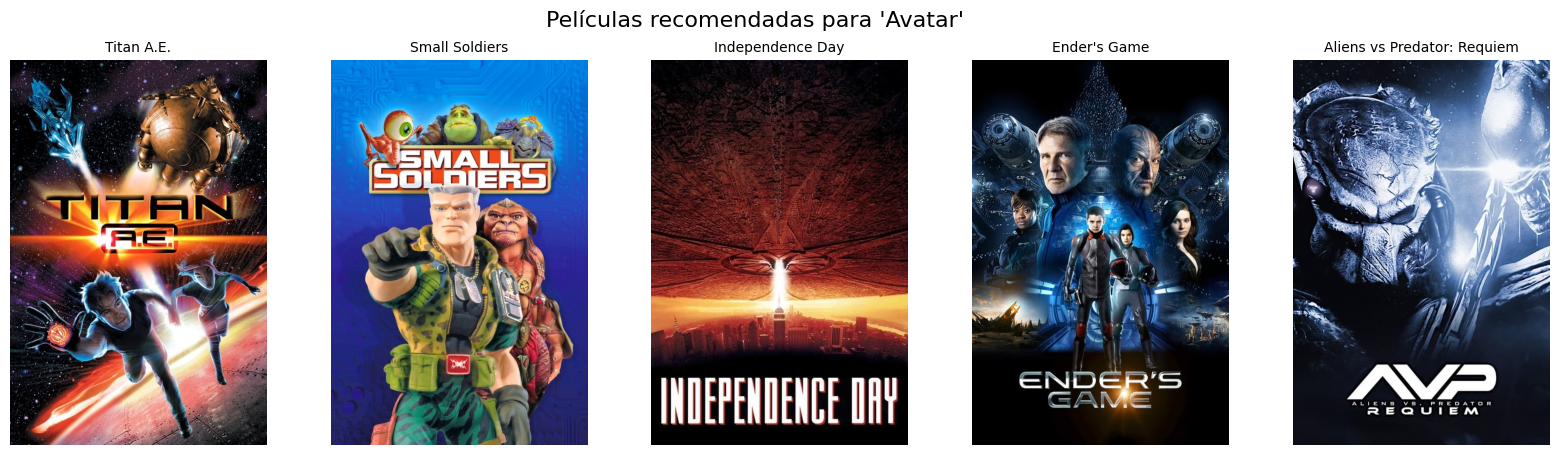

In [31]:
from dotenv import load_dotenv
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Cargar las variables desde .env
load_dotenv()

# Obtener la clave API desde el entorno
API_KEY = os.getenv("TMDB_API_KEY")

def get_poster(title):
    """Obtiene el póster de una película dado su título usando la API de TMDB."""
    base_url = f"https://api.themoviedb.org/3/search/movie"
    params = {
        "api_key": API_KEY,  # Clave API desde el archivo .env
        "query": title       # Título de la película
    }
    
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data["results"]:
            poster_path = data["results"][0].get("poster_path")
            if poster_path:
                return f"https://image.tmdb.org/t/p/w500{poster_path}"
    return None

def plot_recommendations_with_posters(movie):
    """Visualiza las recomendaciones con pósters."""
    # Obtener el índice de la película
    movie_index = df[df["title"] == movie].index[0]

    # Obtener las similitudes
    distances = similarity[movie_index]

    # Ordenar y seleccionar las 5 más similares
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    # Crear un subplot para mostrar las imágenes
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    for ax, (i, _) in zip(axes, movie_list):
        # Obtener título y póster
        title = df.iloc[i].title
        poster_url = get_poster(title)

        # Descargar y mostrar el póster
        if poster_url:
            response = requests.get(poster_url)
            img = Image.open(BytesIO(response.content))
            ax.imshow(img)
        else:
            ax.text(0.5, 0.5, "No Image", ha="center", va="center", fontsize=12)
        
        ax.set_title(title, fontsize=10)
        ax.axis("off")
    
    plt.suptitle(f"Películas recomendadas para '{movie}'", fontsize=16)
    plt.show()

# Probar con una película
plot_recommendations_with_posters("Avatar")


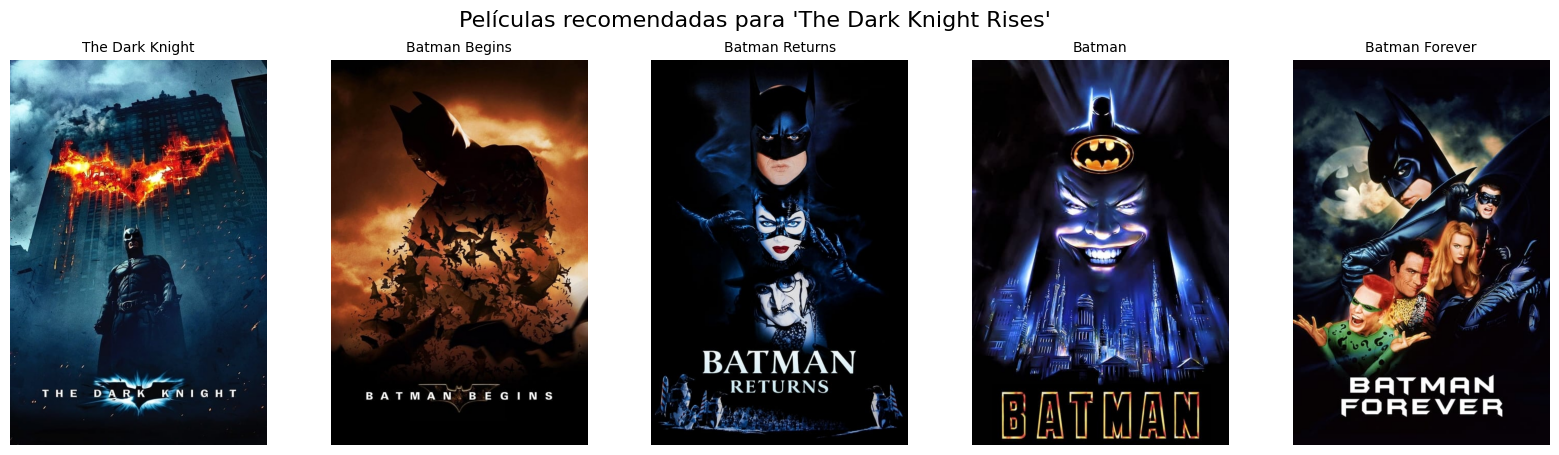

In [32]:
plot_recommendations_with_posters("The Dark Knight Rises")


In [33]:
import os
import pickle

# Ruta absoluta del directorio raíz del proyecto
base_dir = r"C:\Users\solan\OneDrive\Desktop\4GEEKS\Proyectos\ML---K-NEAREST-NEIGHBORS"

# Cambiar al directorio raíz del proyecto
os.chdir(base_dir)  # Cambia el directorio de trabajo al directorio raíz
print(f"Directorio actual: {os.getcwd()}")  # Confirma que estás en la raíz

# Rutas absolutas para los archivos
model_dir = os.path.join(base_dir, "src", "model")
vectorizer_path = os.path.join(model_dir, "vectorizer.pkl")
similarity_path = os.path.join(model_dir, "similarity.pkl")

# Crear la carpeta si no existe
os.makedirs(model_dir, exist_ok=True)

# Guardar el vectorizador
with open(vectorizer_path, "wb") as file:
    pickle.dump(cv, file)

# Guardar la matriz de similitud
with open(similarity_path, "wb") as file:
    pickle.dump(similarity, file)

print(f"Archivos guardados en: {model_dir}")


Directorio actual: C:\Users\solan\OneDrive\Desktop\4GEEKS\Proyectos\ML---K-NEAREST-NEIGHBORS
Archivos guardados en: C:\Users\solan\OneDrive\Desktop\4GEEKS\Proyectos\ML---K-NEAREST-NEIGHBORS\src\model
